# Data Source

** 此系列的文件為Udemy的python金融分析課程系列筆記(https://www.udemy.com/python-for-finance-and-trading-algorithms) **

** 要做數據分析，資料的來源非常重要。本單元介紹兩個簡單的數據取得方法 **


第一種方式是使用pandas的datareader方法

In [1]:
import pandas_datareader.data as web
import datetime

start = datetime.datetime(2015, 1, 1)

end = datetime.datetime(2017, 1, 1)

facebook = web.DataReader("FB", 'google', start, end)

In [2]:
facebook.head()

,Open,High,Low,Close,Volume
Date,,,,,
2015-01-02,78.58,78.93,77.70,78.45,18177475
2015-01-05,77.98,79.25,76.86,77.19,26452191
2015-01-06,77.23,77.59,75.36,76.15,27399288
2015-01-07,76.76,77.36,75.82,76.15,22045333
2015-01-08,76.74,78.23,76.08,78.18,23960953


In [3]:
from pandas_datareader.data import Options

fb_options = Options('FB', 'google')

In [4]:
data = fb_options.get_options_data(expiry=fb_options.expiry_dates[0])

In [5]:
data.head()

Last     Bid     Ask  Chg  PctChg  \
Strike Expiry     Type Symbol                                                   
5.0    2018-01-19 call FB180119C00005000  165.90  167.75  168.20  0.0     0.0   
                  put  FB180119P00005000    0.01     NaN    0.03  0.0     0.0   
10.0   2018-01-19 call FB180119C00010000  161.16  162.85  163.25  0.0     0.0   
                  put  FB180119P00010000    0.01     NaN    0.02  0.0     0.0   
15.0   2018-01-19 call FB180119C00015000  158.00  157.85  158.30  0.0     0.0   

                                          Vol  Open_Int Root  \
Strike Expiry     Type Symbol                                  
5.0    2018-01-19 call FB180119C00005000  NaN    9359.0   FB   
                  put  FB180119P00005000  NaN    3053.0   FB   
10.0   2018-01-19 call FB180119C00010000  NaN    2859.0   FB   
                  put  FB180119P00010000  NaN    2056.0   FB   
15.0   2018-01-19 call FB180119C00015000  NaN     235.0   FB   

                                          Underlying_Price  \
Strike Expiry     Type Symbol                                
5.0    2018-01-19 call FB180119C00005000         172.96001   
                  put  FB180119P00005000         172.96001   
10.0   2018-01-19 call FB180119C00010000         172.96001   
                  put  FB180119P00010000         172.96001   
15.0   2018-01-19 call FB180119C00015000         172.96001   

                                                         Quote_Time  
Strike Expiry     Type Symbol                                        
5.0    2018-01-19 call FB180119C00005000 2017-09-13 15:02:06.956345  
                  put  FB180119P00005000 2017-09-13 15:02:06.956345  
10.0   2018-01-19 call FB180119C00010000 2017-09-13 15:02:06.956345  
                  put  FB180119P00010000 2017-09-13 15:02:06.956345  
15.0   2018-01-19 call FB180119C00015000 2017-09-13 15:02:06.956345

In [7]:
start = datetime.datetime(2010, 1, 1)

end = datetime.datetime(2017, 1, 1)

gdp = web.DataReader("GDP", "fred", start, end)

In [8]:
gdp.head()

,GDP
DATE,
2010-01-01,14681.1
2010-04-01,14888.6
2010-07-01,15057.7
2010-10-01,15230.2
2011-01-01,15238.4


另外一種方式是使用Quandl套件

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
import quandl

guandl.get方法可以從特定的資料庫取得特定資料，例如: EIA/PET_RWTC_D 即為從EIA資料庫取得油價

相關的編碼表可以從quandl網站取得：

https://www.quandl.com/

In [15]:
mydata = quandl.get("EIA/PET_RWTC_D")

In [16]:
mydata.head()

,Value
Date,
1986-01-02,25.56
1986-01-03,26.00
1986-01-06,26.53
1986-01-07,25.85
1986-01-08,25.87


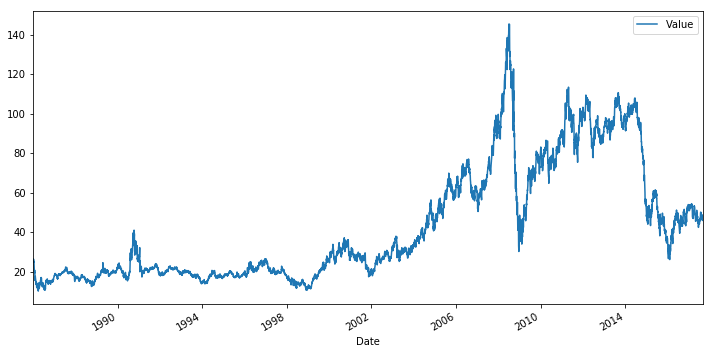

In [17]:
mydata.plot(figsize=(12,6))

也可以設定取得的data格式是numpy

In [20]:
mydata = quandl.get("EIA/PET_RWTC_D", returns="numpy")
mydata

rec.array([(datetime.datetime(1986, 1, 2, 0, 0),  25.56),
 (datetime.datetime(1986, 1, 3, 0, 0),  26.  ),
 (datetime.datetime(1986, 1, 6, 0, 0),  26.53), ...,
 (datetime.datetime(2017, 8, 31, 0, 0),  47.26),
 (datetime.datetime(2017, 9, 1, 0, 0),  47.32),
 (datetime.datetime(2017, 9, 5, 0, 0),  48.63)], 
          dtype=[('Date', 'O'), ('Value', '<f8')])

In [21]:
mydata = quandl.get("FRED/GDP", start_date="2001-12-31", end_date="2005-12-31")
mydata.head()

,Value
Date,
2002-01-01,10834.4
2002-04-01,10934.8
2002-07-01,11037.1
2002-10-01,11103.8
2003-01-01,11230.1


In [22]:
mydata = quandl.get(["NSE/OIL.1", "WIKI/AAPL.4"])

In [25]:
mydata.head()

,NSE/OIL - Open,WIKI/AAPL - Close
Date,,
1980-12-12,NaN,28.75
1980-12-15,NaN,27.25
1980-12-16,NaN,25.25
1980-12-17,NaN,25.87
1980-12-18,NaN,26.63


In [26]:
mydata.tail()

,NSE/OIL - Open,WIKI/AAPL - Close
Date,,
2017-09-06,307.0,161.91
2017-09-07,311.9,161.26
2017-09-08,307.5,158.63
2017-09-11,312.2,161.50
2017-09-12,334.0,160.82


In [29]:
quandl.ApiConfig.api_key = "YOUR_KEY_HERE"
mydata = quandl.get("FRED/GDP")

In [31]:
mydata = quandl.get('WIKI/FB',start_date='2015-01-01',end_date='2017-01-01')

In [32]:
mydata.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2015-01-02,78.58,78.9300,77.700,78.450,18177475.0,0.0,1.0,78.58,78.9300,77.700,78.450,18177475.0
2015-01-05,77.98,79.2455,76.860,77.190,26452191.0,0.0,1.0,77.98,79.2455,76.860,77.190,26452191.0
2015-01-06,77.23,77.5900,75.365,76.150,27399288.0,0.0,1.0,77.23,77.5900,75.365,76.150,27399288.0
2015-01-07,76.76,77.3600,75.820,76.150,22045333.0,0.0,1.0,76.76,77.3600,75.820,76.150,22045333.0
2015-01-08,76.74,78.2300,76.080,78.175,23960953.0,0.0,1.0,76.74,78.2300,76.080,78.175,23960953.0


In [33]:
mydata = quandl.get('WIKI/FB.1',start_date='2015-01-01',end_date='2017-01-01')

In [34]:
mydata.head()

,Open
Date,
2015-01-02,78.58
2015-01-05,77.98
2015-01-06,77.23
2015-01-07,76.76
2015-01-08,76.74


In [35]:
mydata = quandl.get('WIKI/FB.7',start_date='2015-01-01',end_date='2017-01-01')

In [36]:
mydata.head()

,Split Ratio
Date,
2015-01-02,1.0
2015-01-05,1.0
2015-01-06,1.0
2015-01-07,1.0
2015-01-08,1.0


In [37]:
houses = quandl.get('ZILLOW/M11_ZRIAH')

In [38]:
houses.head()

,Value
Date,
2010-11-30,2241.0
2010-12-31,2254.0
2011-01-31,2276.0
2011-02-28,2305.0
2011-03-31,2334.0


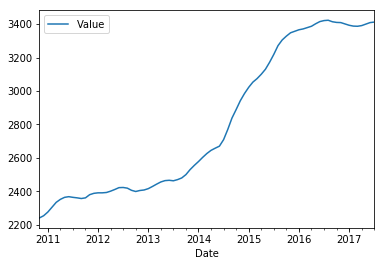

In [39]:
houses.plot()